# FordGoBike Data (June 2018 - July 2019)

### by Crystal

### About FordGoBike Data
Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate, in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. In this project, I will perform an exploatory analysis on data provided by Ford Go Bike, a bike-share system provider taken in from 2018 June to 2019 June. Source: https://s3.amazonaws.com/baywheels-data/index.html

### Investigation Overview
June is the most popular month and December is the least demanded month due to the weather conditions. Thursday is the most demanded day of the week due to the daily commute and the weekend is the least demanded, especially for Sunday. The trip duration is less than 1800 seconds. In additions, 6 to 15 minutes are the most common duration. It is due to the extra $3 charges for additional 15 minutes, and also most of communte times takes only 5-15 minutes. 89% are subscribers while 11 % are customers, which means the most of GoBike users are subscribers. Both for subscribers and customers, there are more female users than male. The ratio for subscribers are three times greater between the different gender while it is twice greater for customers. Subscriber use the system mostly within a week while customer use it mostly on the weekend. Subscriber mostly use 8-9am and 17-18pm while customer suse the bike share system througout the day. There are some missing datas between 2018.07 and 2018.10, and also between 2019.04 and 2019.05. The daily trend of bike rides shows the increasing numbers of bike rides in 2019 March and decreasing numbers in 2018 December and 2019 January.

In [1]:
# import all packages and set plots to be embedded inline
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math
import glob
import os
import subprocess
import calendar
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

In [2]:

df = pd.read_csv(r"C:\Users\cryst\Downloads\201806-fordgobike-tripdata.csv")
df1 = pd.read_csv(r"C:\Users\cryst\Downloads\201810-fordgobike-tripdata.csv")
df2 = pd.read_csv(r"C:\Users\cryst\Downloads\201811-fordgobike-tripdata.csv")
df3 = pd.read_csv(r"C:\Users\cryst\Downloads\201812-fordgobike-tripdata.csv")
df4 = pd.read_csv(r"C:\Users\cryst\Downloads\201901-fordgobike-tripdata.csv")
df5 = pd.read_csv(r"C:\Users\cryst\Downloads\201902-fordgobike-tripdata.csv")
df6 = pd.read_csv(r"C:\Users\cryst\Downloads\201903-fordgobike-tripdata.csv")
df7 = pd.read_csv(r"C:\Users\cryst\Downloads\201905-baywheels-tripdata.csv")
df8 = pd.read_csv(r"C:\Users\cryst\Downloads\201906-baywheels-tripdata.csv")

In [3]:
df = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8], sort=True)

In [4]:
df = pd.read_csv('fordobike.csv')
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age,start_time_month_name,start_time_month,start_time_weekday,start_time_hour
0,2100,Yes,59088,2100,37.766219,-122.431060,Sanchez St at 15th St,2018-07-01 15:57:33.316,1975,Male,...,37.771662,-122.422423,McCoppin St at Valencia St,2018-06-30 23:32:44.659,Subscriber,44,June,6,Sat,23
1,3235,No,63654,3235,37.780526,-122.390288,2nd St at Townsend St,2018-07-01 14:07:47.232,1962,Female,...,37.791464,-122.391034,The Embarcadero at Steuart St,2018-06-30 20:26:53.031,Subscriber,57,June,6,Sat,20
2,3675,No,50508,3675,37.770030,-122.411726,11th St at Bryant St,2018-07-01 10:31:48.250,1992,Male,...,37.776619,-122.417385,Market St at 10th St,2018-06-30 20:29:59.813,Subscriber,27,June,6,Sat,20
3,3232,No,51697,3232,37.850578,-122.278175,Woolsey St at Sacramento St,2018-07-01 08:46:33.739,1989,Female,...,37.808894,-122.256460,Grand Ave at Perkins St,2018-06-30 18:24:56.696,Customer,30,June,6,Sat,18
4,779,No,7224,779,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-07-01 01:01:24.433,1989,Male,...,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-06-30 23:01:00.400,Subscriber,30,June,6,Sat,23


# Age Distribution of Users 
#### Most of users under 40 and ages overs 60 are dropped. The mean age is 34. 

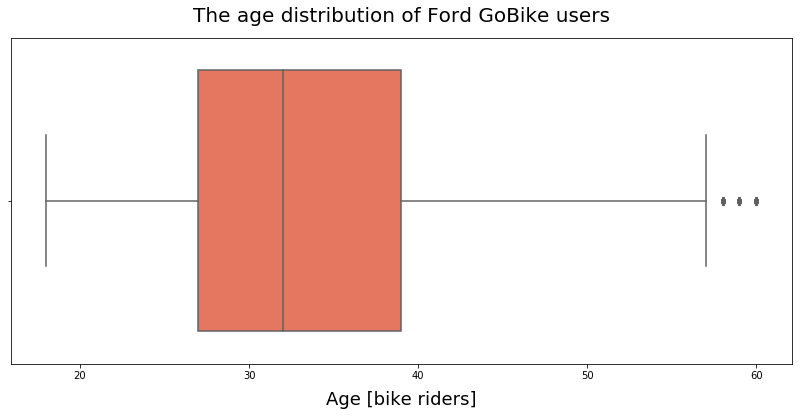

In [36]:
plt.figure(figsize=(14,6))
sns.boxplot(x='member_age', data=df, palette='Reds', orient='h')
plt.title("The age distribution of Ford GoBike users", fontsize=20, y=1.03)
plt.xlabel("Age [bike riders]", fontsize=18, labelpad=10)
plt.savefig('image01.png');

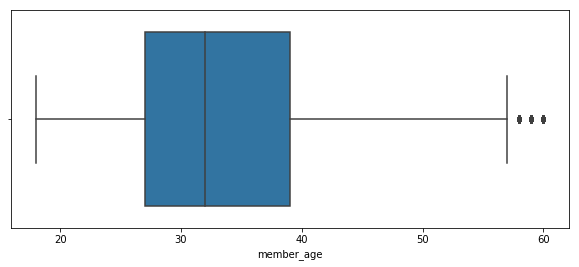

In [25]:
# code for the age boxplot

plt.figure(figsize = [10, 4])
base_color = sns.color_palette()[0]

sns.boxplot(data=df_clean, x='member_age', color=base_color);

In [26]:
df_clean.member_age.mean()

34.0357762901326

In [27]:
df_clean.member_age.describe(percentiles = [ .95])

count    1.515445e+06
mean     3.403578e+01
std      9.050938e+00
min      1.800000e+01
50%      3.200000e+01
95%      5.300000e+01
max      6.000000e+01
Name: member_age, dtype: float64

In [28]:
df_clean = df_clean.query('member_age <=60')

# Monthly/ Weekly/ Hourly usage of the bike sharing system
#### June is the highest demanded month, and december is the least demanded month due to weather conditions. Thursday is the most demanded day of the week due to daily commute, and the weekend is the least demanded, especially for Sunday. The most used hours is 8-9am and 05-06pm when users commute to their school/work.

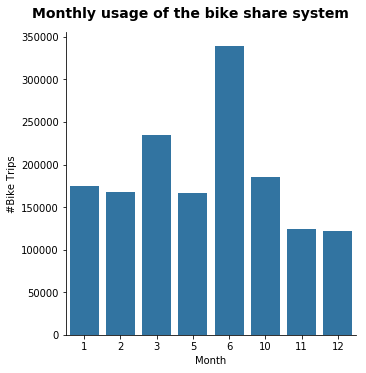

In [33]:
# monthly usege of the bike sharing system
g = sns.catplot(data=df_clean, x='start_time_month', kind='count', color = base_color)
g.set_axis_labels("Month", "#Bike Trips")
g.fig.suptitle('Monthly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

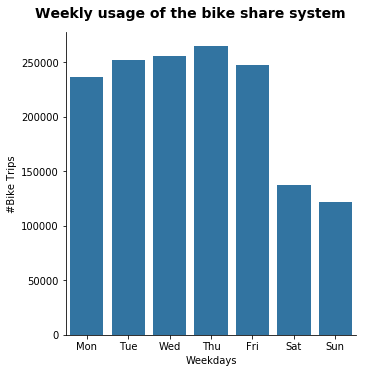

In [34]:
# weekday usege of the bike sharing system

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', kind='count', color = base_color, order = weekday)
g.set_axis_labels("Weekdays", "#Bike Trips")
g.fig.suptitle('Weekly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

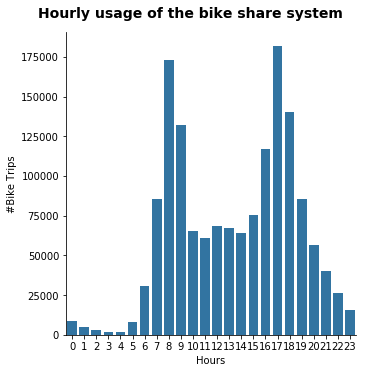

In [35]:
# hourly usege of the bike sharing system

g = sns.catplot(data=df_clean, x='start_time_hour', kind='count', color = base_color)
g.set_axis_labels("Hours", "#Bike Trips")
g.fig.suptitle('Hourly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

# Trip Duration 
#### The trip duration is less than 1800 seconds. In additions, 6 to 15 minutes are the most common duration. It is due to the extra $3 charges for additional 15 minutes, and also most of communte times takes only 5-15 minutes. 

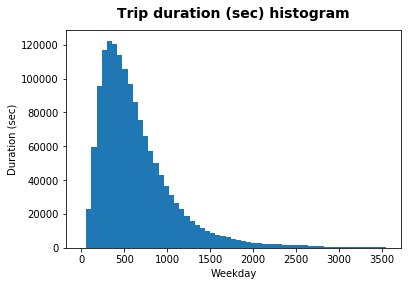

In [37]:
# code for the (histogram) duration (sec) distribution per user type

bin_edges = np.arange(0, 3600,60)

plt.hist(data = df_clean, x = 'duration_sec', bins = bin_edges)

plt.title("Trip duration (sec) histogram", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Weekday')
plt.ylabel('Duration (sec)');

# Types of Users: Subscribers and Customers 
#### 89% are subscribers while 11 % are customers, which means the most of GoBike users are subscribers. June is the most popular month both for customers and subscribers. The least popular month is November and December due to the cold weather. Subsribers have higher use in winter compared to customers. The trip duration for subscribers are less than customers based on the boxplot, which means subscribers use bikes for shorter destination compared to customers. Both for subscribers and customers, there are more female users than male. The ratio for subscribers are three times greater between the different gender while it is twice greater for customers. 

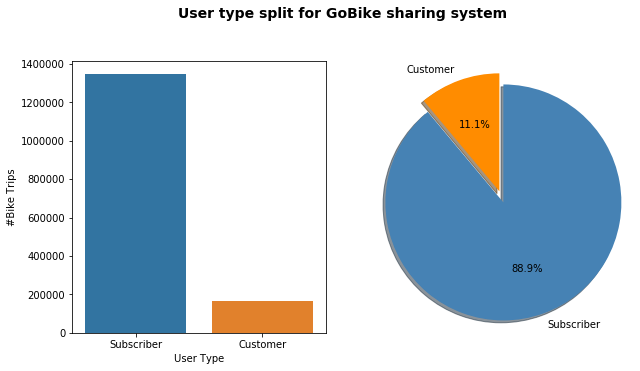

In [39]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');

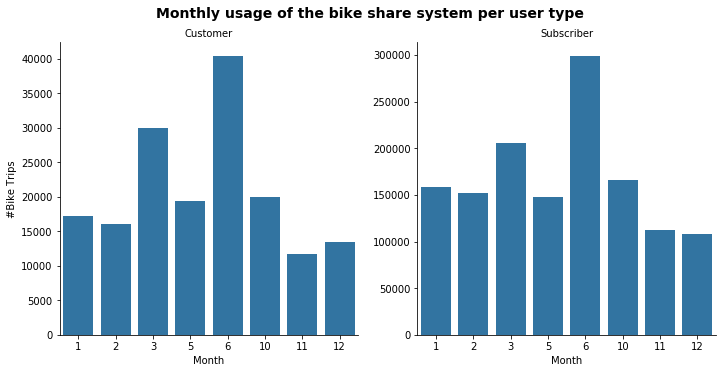

In [40]:
# monthly usege of the bike sharing system per user type
g = sns.catplot(data=df_clean, x='start_time_month', col="user_type", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Month", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

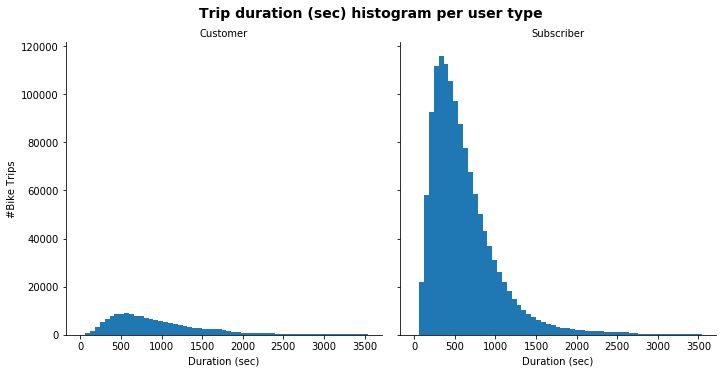

In [41]:
# code for the (histogram) duration (sec) distribution per user type

g = sns.FacetGrid(df_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (sec)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) histogram per user type', y=1.03, fontsize=14, fontweight='semibold');

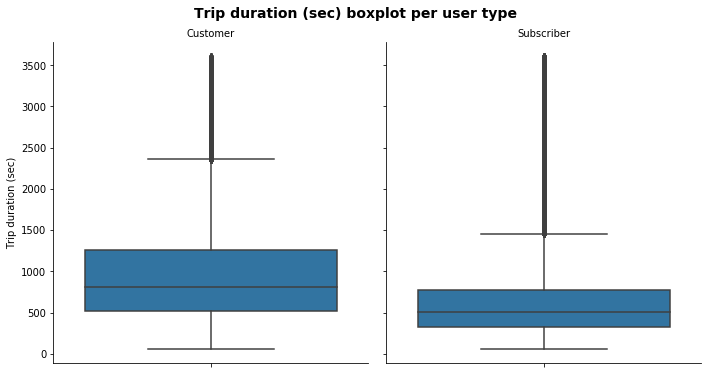

In [43]:
# code for the (boxplot) duration (sec) distribution per user type

data = df_clean.query('duration_sec < 3600')
g = sns.catplot(data=data, y='duration_sec', col="user_type", kind='box',
            color = base_color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (sec)")
g.fig.suptitle('Trip duration (sec) boxplot per user type', y=1.03, fontsize=14, fontweight='semibold');

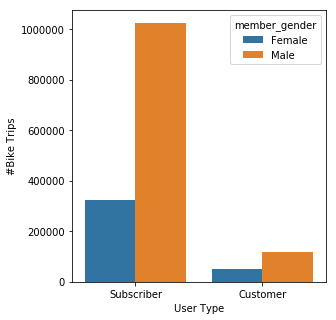

In [44]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", hue="member_gender", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips');

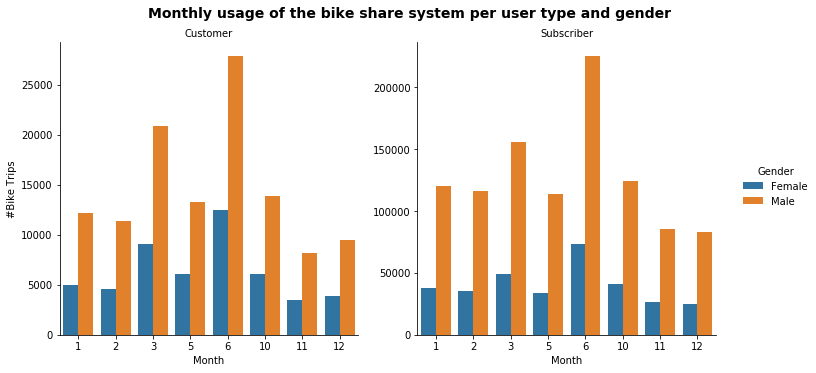

In [45]:
# monthly usege of the bike sharing system per user type and gender

g = sns.catplot(data=df_clean, x='start_time_month', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Month", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

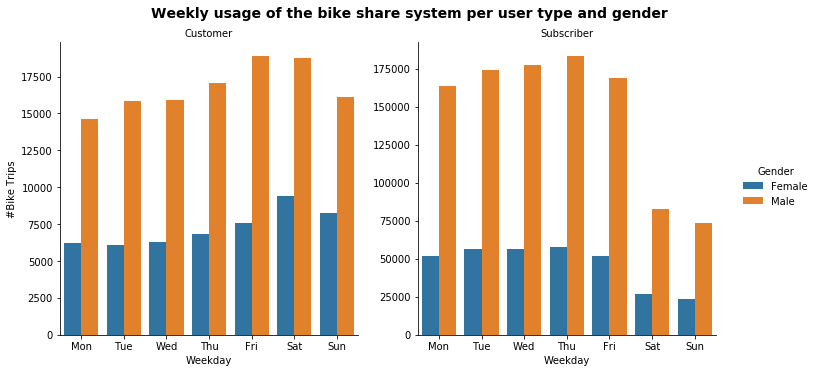

In [46]:
# weekday usege of the bike sharing system per user type and gender

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

#### Subscriber use the system mostly within a week while customer use it mostly on the weekend. 

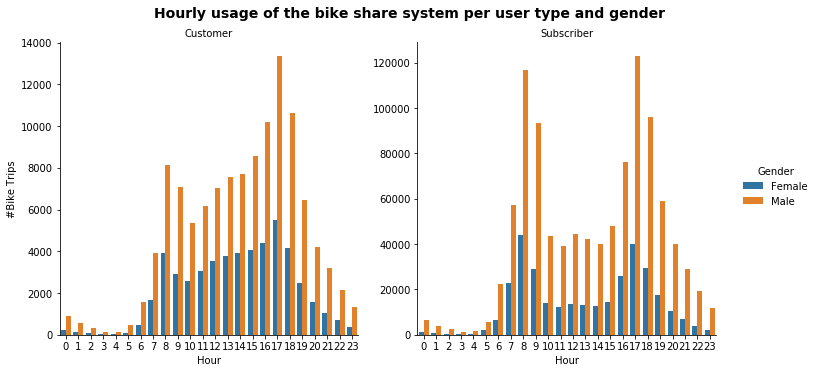

In [47]:
# hourly usege of the bike sharing system per user type and gender

g = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", hue='member_gender', kind='count', sharey = False)
g.set_axis_labels("Hour", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

#### Subscriber mostly use 8-9am and 17-18pm while customer suse the bike share system througout the day.

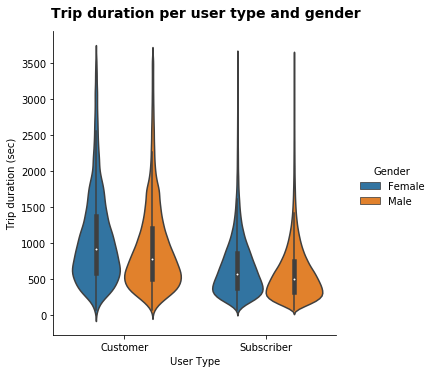

In [48]:
# code for the (violinplot) duration (sec) distribution per user type and gender

g = sns.catplot(data=data, x='user_type', y="duration_sec", hue="member_gender", kind="violin")

g.set_axis_labels("User Type", "Trip duration (sec)")
g._legend.set_title('Gender')
g.fig.suptitle('Trip duration per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

#### Female takes longer trip duration than male for both of customers and subscribers. 

# Summarize the data of customers and subscribers

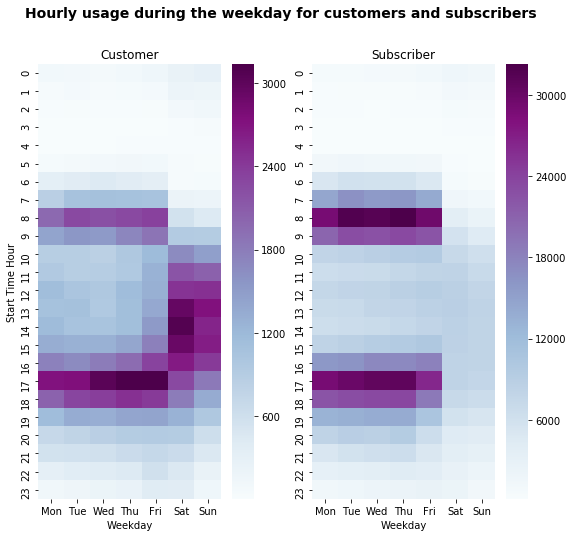

In [66]:
# Setting the weekday order
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

# Ford GoBike System - Summary

- Subscribers and customers benefit from lifestyle friendly method of commuting to works/school/other places. Most of them use it less than 1800 seconds since there is an extra 3 dollars charge after 15 minutes. 89% are subscribers while 11% are customers, which means that subscribers are the primarily clients and they use it more often for short commute distance on the weekdays at 8 to 9am and 5 to 6pm. June is the most popular month both for customers and subscribers. The least popular month is November and December due to the cold weather. Subsribers have higher use in winter compared to customers. 